In [1]:
# Filters out the warnings
import warnings
warnings.filterwarnings('ignore')

In [60]:
# Importing the require libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff

# *Olympics Games Assignments*

This is the olympics games dataset along with the past seasons since 1896 with various pieces of information about the games, winner, medals,coutry, city, region, player names, ID etc. In this assignment i'll try to find some interesting insights into these information using python. 

In [3]:
# Using 'read_csv' to read the csv file
df = pd.read_csv('/content/athlete_events.csv')
region_df = pd.read_csv('/content/noc_regions.csv')

In [4]:
# let's check what's in the data set
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
# checking how many rows and colunm are there in data
df.shape

(271116, 15)

In [6]:
# Filtering the data according to season
df[df['Season']=='Summer']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271106,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN
271107,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN
271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN


In [7]:
# lets analyze the data according to summer season only
df = df[df['Season']=='Summer']

In [8]:
# Now checking the number of rows ans colunms
df.shape

(222552, 15)

In [9]:
# Again, checking the data sets 
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN


In [10]:
#lets take a look on a another datasets name 'region'
region_df.head()


,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


We see the both table has a similar colunm name NOC. If we merge the table, in other words if we apply inner join method so we can see region colunm in our first datasets.

In [11]:
# Aplly inner joint operator to merge the table
df.merge(region_df,on='NOC',how='left')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN


In [12]:
# lets creat a new df to solve the upcomming task
df = df.merge(region_df,on='NOC',how='left')

In [13]:
# Now we find how many countries participated in olympic games
df['region'].unique()

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Sri Lanka', 'Armenia',
       'Ivory Coast', 'Kenya', 'Ben

In [14]:
# Finding duplicates values
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

You can see the NOC and region values are not the same thats because some NOC are not related to any region thats is why ther's difference between these two colunm. [more](https://en.wikipedia.org/wiki/All-time_Olympic_Games_medal_table)

In [15]:
# Now checking the duplicates rows
df.duplicated().sum()

1385

In [16]:
# You can see there's are many duplicates rows so now lets dropped the duplicate rows
df.drop_duplicates(inplace=True) 

In [17]:
# Now check the if there's any duplicate rows
df.duplicated().sum()

0

In [18]:
# Now we are calculating medals at the basis of NOC
df['Medal'].value_counts()

Gold      11456
Bronze    11409
Silver    11212
Name: Medal, dtype: int64

In [19]:
# Now we are creaating one colunm for each medal(gold,silver,bronze) and concatinate these colunms into the main dataset.
df = pd.concat([df,pd.get_dummies(df['Medal'])],axis=1)

In [20]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


In [21]:
# Now we are grouped-by NOC and sum-up GOld, Silver, Bronze colunm
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

,NOC,Gold,Silver,Bronze
0,USA,2472.0,1333.0,1197.0
1,URS,832.0,635.0,596.0
2,GBR,635.0,729.0,620.0
3,GER,592.0,538.0,649.0
4,ITA,518.0,474.0,454.0
...,...,...,...,...
225,AHO,0.0,1.0,0.0
226,LBR,0.0,0.0,0.0
227,LCA,0.0,0.0,0.0
228,LES,0.0,0.0,0.0


In [22]:
# As per the wikipedia information there's huge gap between medals counts. Thats means we need to drop the duplicates colunms to find the accurate counts of medals and rename the dataset
medal_tally = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [23]:
medal_tally.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

,NOC,Gold,Silver,Bronze
0,USA,1035.0,802.0,708.0
1,URS,394.0,317.0,294.0
2,GBR,278.0,317.0,300.0
3,GER,235.0,261.0,283.0
4,FRA,234.0,256.0,287.0
...,...,...,...,...
225,AHO,0.0,1.0,0.0
226,LBR,0.0,0.0,0.0
227,LCA,0.0,0.0,0.0
228,LES,0.0,0.0,0.0


Look at the difference between numbers of medals the duplicates colunms are dropout and the datasets is cleard. lets move to the next steps

In [24]:
# Now we are adding total colunms in the table which is show the total number or medals ecah region have.
medal_tally['total'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze'] 

In [25]:
# Checking the dataset
medal_tally

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver,total
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,...,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,...,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,...,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,...,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0,1
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,...,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222528,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,...,Melbourne,Athletics,Athletics Women's Shot Put,Silver,Russia,NaN,0,0,1,1
222530,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,...,Tokyo,Athletics,Athletics Women's Shot Put,Bronze,Russia,NaN,1,0,0,1
222536,135556,Bogusaw Stanisaw Zychowicz,M,19.0,189.0,80.0,Poland,POL,1980 Summer,1980,...,Moskva,Swimming,Swimming Men's 100 metres Butterfly,NaN,Poland,NaN,0,0,0,0
222537,135556,Bogusaw Stanisaw Zychowicz,M,19.0,189.0,80.0,Poland,POL,1980 Summer,1980,...,Moskva,Swimming,Swimming Men's 200 metres Butterfly,NaN,Poland,NaN,0,0,0,0


In [26]:
# Now we are cheking in which years olympics are organized 
years = df['Year'].unique().tolist()

In [27]:
years.sort()

In [28]:
years.insert(0,'Overall')

In [29]:
years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [30]:
# Similarly we can see in which country olympics are organized
country = np.unique(df['region'].dropna().values).tolist()

In [31]:
country.sort()

In [32]:
country.insert(0,'Overall')

In [33]:
country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

Now we are finding the total number of edition, cities, events or sports, no. of athelets and participated nation. With the help of these information we are going create beautiful visualization and differents graphs. 

In [34]:
# FInding in which years olympics are palyed.
df['Year'].unique().shape

(29,)

In [35]:
# FInding in which cities olympics are palyed.
df['City'].unique().shape

(23,)

In [36]:
# FInding which sports are played in olympics.
df['Sport'].unique().shape

(52,)

In [37]:
# FInding which events sare played in olympics.
df['Event'].unique().shape

(651,)

In [38]:
# FInding how many athelets are participated in olympics.
df['Name'].unique().shape

(116122,)

In [39]:
# FInding which country are participated in olympics.
df['region'].unique().shape

(206,)

In [40]:
# Now we are using a line graphs to see over the years how many nations are participated in olympics.
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


In [41]:
# Clearing the data, sort the data and save them in new variable  
nation_over_time = df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('index')

In [42]:
# Renaming the columns name to cut the confusion
nation_over_time.rename(columns = {'index': 'Year','Year':'no. of countries'}, inplace = True)

In [43]:
# Ploting the line grapph values
fig = px.line(nation_over_time, x='Year', y='no. of countries')
fig.show() 

As you can see the the going upwords trough the year. But in 1980 the participated countries is low becaue of some war issue and that's the reason many countries not able to participated in plympics. 

In [47]:
# Now we are checking how many events/sports are organized in each olympics. Start with clearing the columns
x = df.drop_duplicates(['Year','Sport','Event'])

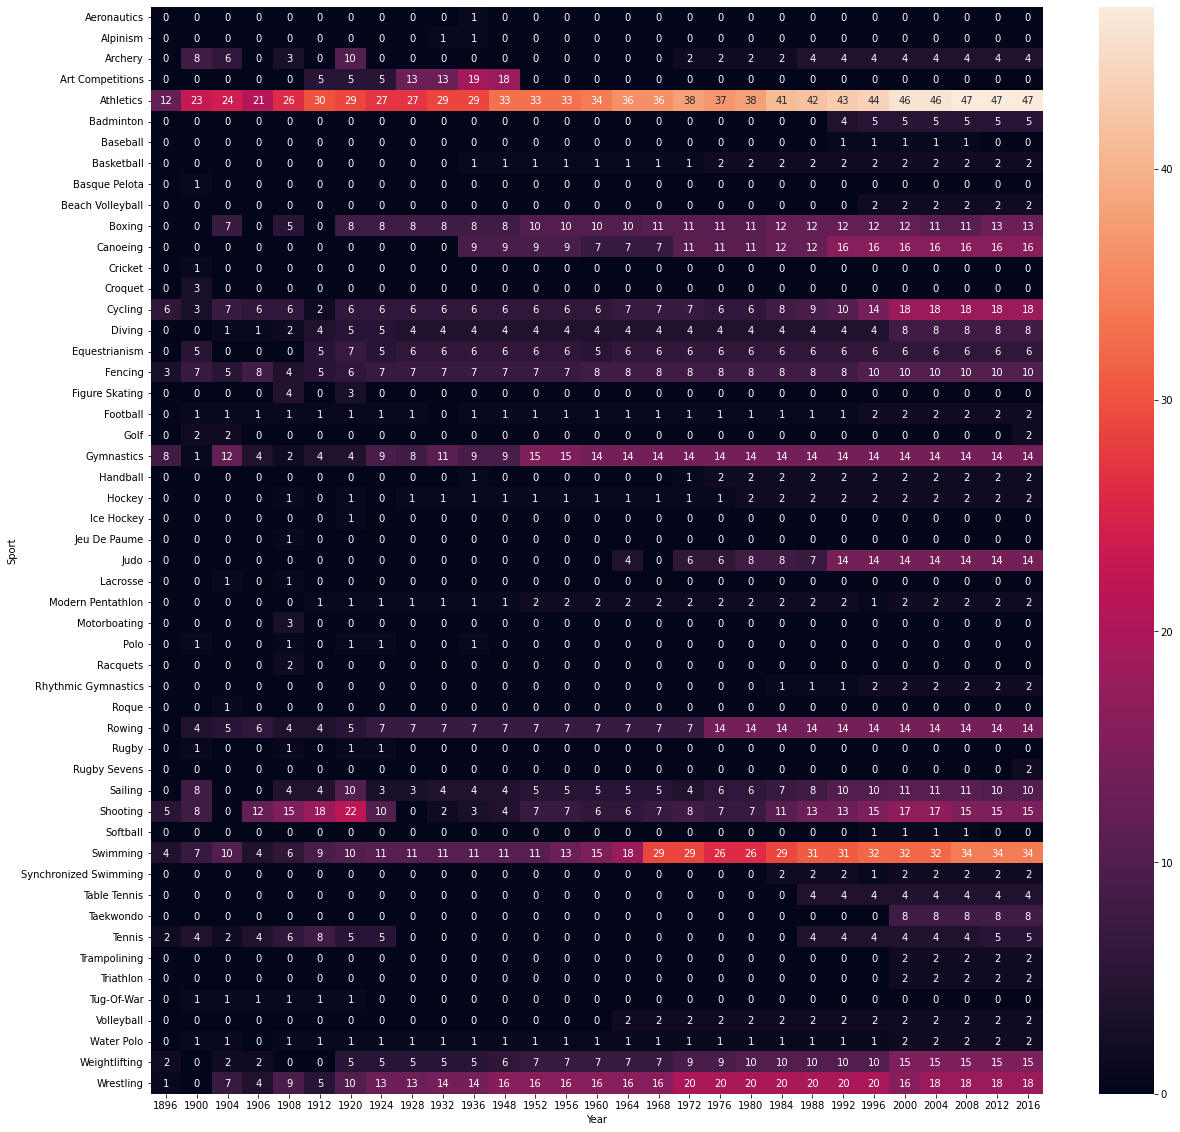

In [52]:
# Creating a heatmap to see the how many events/sports are organized in each olympics
plt.figure(figsize=(20,20))
sns.heatmap(x.pivot_table(index='Sport', columns='Year', values='Event', aggfunc='count').fillna(0).astype(int),annot = True)

In [53]:
# Now we are checking how was the india perfomance trough the years with help of lineplot.
temp_df = df.dropna(subset = ['Medal'])
temp_df.drop_duplicates(subset = ['Team','NOC','Games','Year','City','Sport','Event','Medal'],inplace=True)

In [55]:
new_df = temp_df[temp_df['region']=='India']
final_df = new_df.groupby('Year').count()['Medal'].reset_index()

In [56]:
fig = px.line(final_df, x='Year', y='Medal')
fig.show()

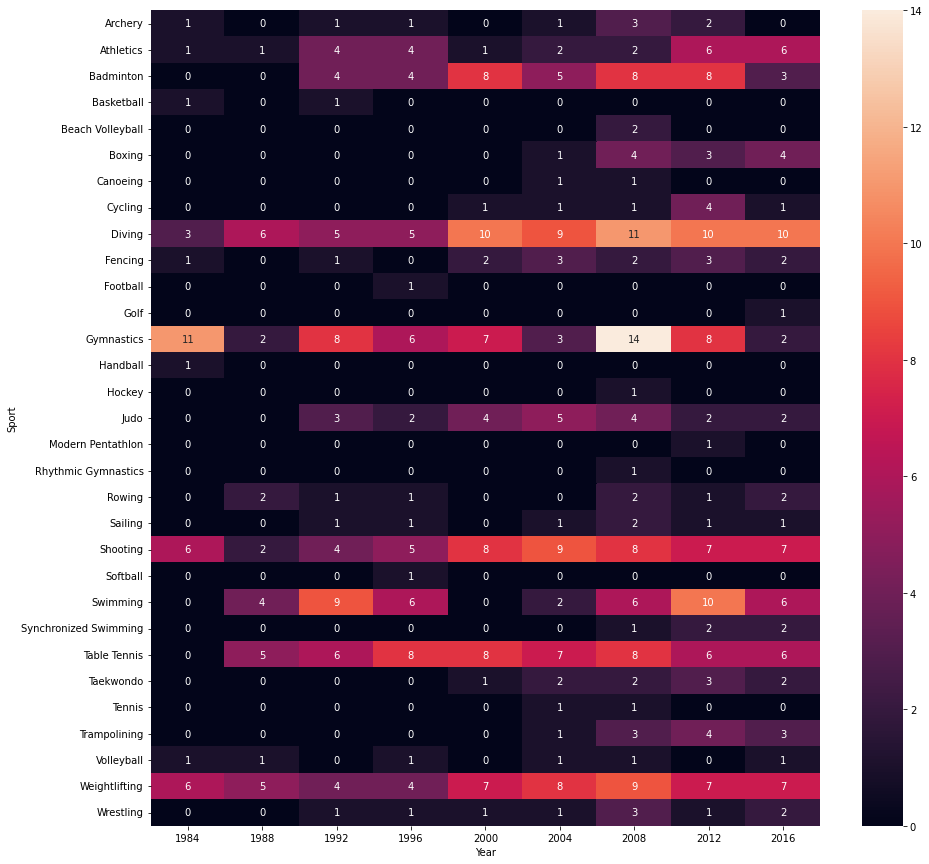

In [59]:
# Now we are creating heatmap to see in which game china are good.
new_df = temp_df[temp_df['region']=='China']
plt.figure(figsize =(15,15))
sns.heatmap(new_df.pivot_table(index = 'Sport' , columns = 'Year', values = 'Medal', aggfunc='count').fillna(0).astype(int),annot = True)

In [61]:
# Now we are creating a distribution plot to see in which age athelets geting most number of medals.
athelet_df = df.drop_duplicates(subset = ['Name','region'])

In [62]:
#Now we are filtering the columns
x1 = athelet_df['Age'].dropna()
x2 = athelet_df[athelet_df['Medal']=='Gold']['Age'].dropna()
x3 = athelet_df[athelet_df['Medal']=='Silver']['Age'].dropna()
x4 = athelet_df[athelet_df['Medal']=='Bronze']['Age'].dropna()

In [66]:
#ploting the graph
fig = ff.create_distplot([x1,x2,x3,x4],['Over All Age','Gold Medalist','Silver Medalist','Bronze Medalist'],show_hist=False,show_rug=False)
fig.show()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222544,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze,Russia,NaN,1,0,0
222546,135565,Fernando scar Zylberberg,M,23.0,168.0,76.0,Argentina,ARG,2000 Summer,2000,Summer,Sydney,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN,0,0,0
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN,0,0,0
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0


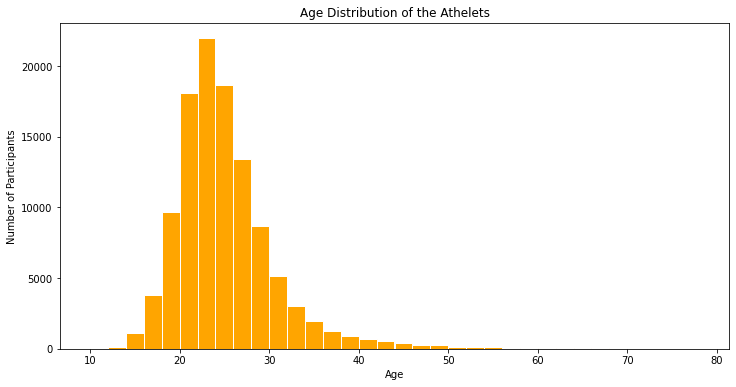

In [75]:
# Age distribution of the  participant

plt.figure(figsize=(12,6))
plt.title('Age Distribution of the Athelets')
plt.xlabel('Age')
plt.ylabel('Number of Participants')
plt.hist(athelet_df.Age, bins = np.arange(10,80,2), color='orange', edgecolor = 'white');

In [76]:
# counting the Male and Female athelets

gender_counts = athelet_df.Sex.value_counts()
gender_counts

M    87983
F    28902
Name: Sex, dtype: int64

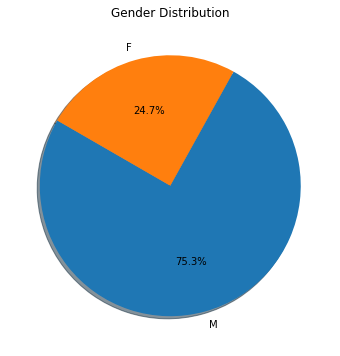

In [80]:
# Pie plot for male and female athelets

plt.figure(figsize=(12,6))
plt.title('Gender Distribution')
plt.pie(gender_counts, labels = gender_counts.index, autopct= '%1.1f%%', startangle = 150, shadow = True);

In [86]:
# Total numbers of Female athelets in each olympics
female_participants = athelet_df[(athelet_df.Sex == 'F') & (athelet_df.Season == 'Summer')][['Sex', 'Year']]
female_participants = female_participants.groupby('Year').count().reset_index()
female_participants.tail() 

,Year,Sex
23,2000,2790
24,2004,2820
25,2008,2947
26,2012,2919
27,2016,3209


Text(0.5, 1.0, 'Womens Participation')

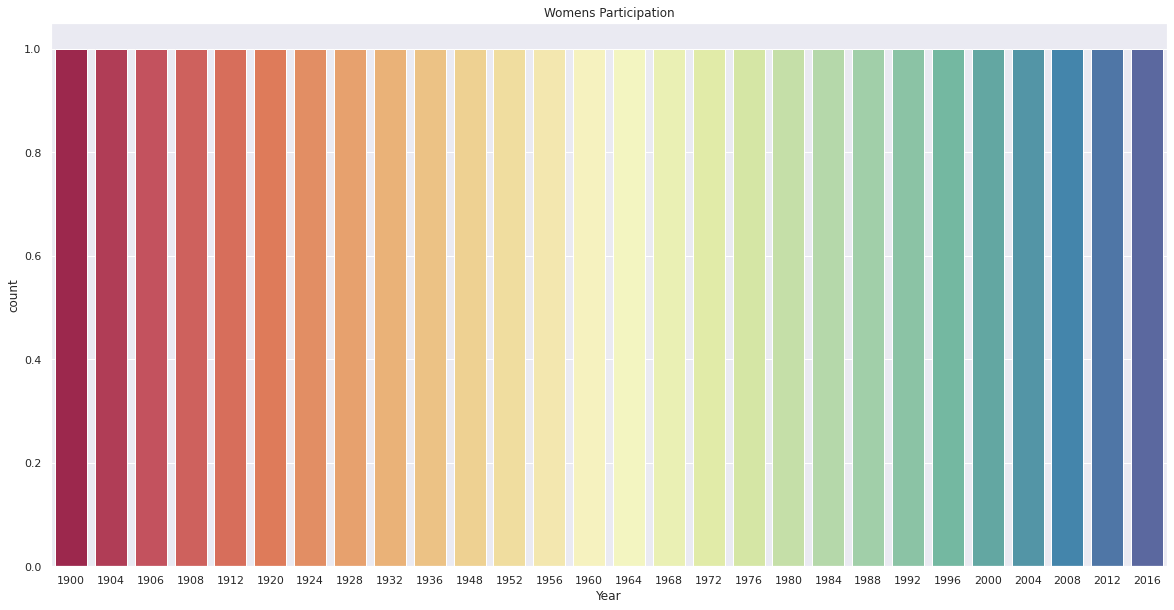

In [90]:
#ploting the graph to see women athelets performance

sns.set(style = 'darkgrid')
plt.figure(figsize=(20,10))
sns.countplot(x = 'Year', data = female_participants, palette = 'Spectral')
plt.title('Womens Participation')

In [92]:
# Gold Medal athelets
goldMedals = athelet_df[(athelet_df.Medal == 'Gold')]
goldMedals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
33,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,Norway,NaN,0,1,0
60,42,Thomas Valentin Aas,M,25.0,NaN,NaN,Taifun,NOR,1912 Summer,1912,Summer,Stockholm,Sailing,Sailing Mixed 8 metres,Gold,Norway,NaN,0,1,0
111,73,Luc Abalo,M,23.0,182.0,86.0,France,FRA,2008 Summer,2008,Summer,Beijing,Handball,Handball Men's Handball,Gold,France,NaN,0,1,0
116,76,Jouan Patrice Abanda Etong,M,22.0,185.0,82.0,Cameroon,CMR,2000 Summer,2000,Summer,Sydney,Football,Football Men's Football,Gold,Cameroon,NaN,0,1,0


In [95]:
# Gold Medals from each country
goldMedals.region.value_counts().reset_index(name = 'Medal').head(5)

,index,Medal
0,USA,1201
1,Russia,609
2,Germany,531
3,UK,315
4,Italy,248


Text(0.5, 1.0, 'Gold Medal per Country')

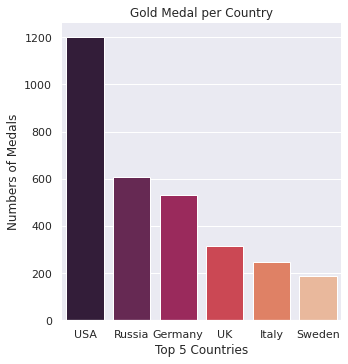

In [96]:
# Creating a catplot for above table

totalGoldMedal = goldMedals.region.value_counts().reset_index(name = 'Medal').head(6)
g = sns.catplot(x = 'index' , y = 'Medal', data = totalGoldMedal, height=5, kind='bar', palette='rocket')
g.despine(left=True)
g.set_xlabels('Top 5 Countries')
g.set_ylabels('Numbers of Medals')
plt.title('Gold Medal per Country')

In [98]:
# Lets check Rio olympics data

max_year = athelet_df.Year.max()
print(max_year)
team_names = athelet_df[(athelet_df.Year == max_year) & (athelet_df.Medal == 'Gold')].Team
team_names.value_counts().head(10)

2016


United States    54
Russia           27
Brazil           27
China            22
Germany          20
Great Britain    18
Australia        17
Fiji             13
Japan             8
Denmark           8
Name: Team, dtype: int64

Text(0.5, 0, 'Country Wise Medals for the year 2016')

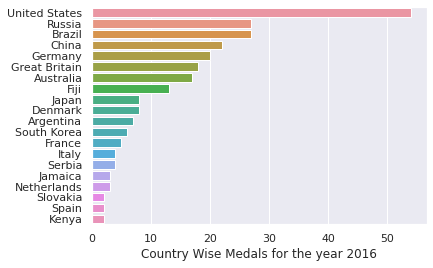

In [101]:
# create a Bar Graph for the above infomation

sns.barplot(x = team_names.value_counts().head(20), y = team_names.value_counts().head(20).index)
plt.ylabel(None);
plt.xlabel('Country Wise Medals for the year 2016')

Text(0.5, 1.0, 'Height vs weight of olympic medalist')

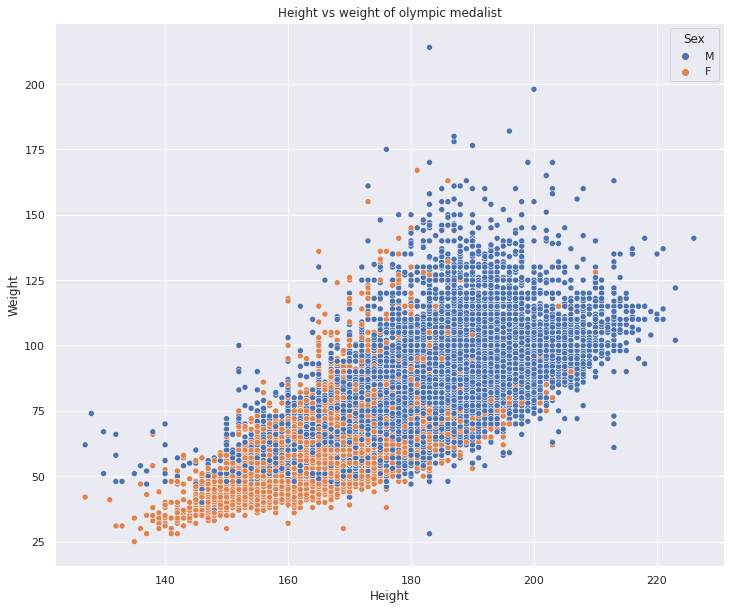

In [104]:
plt.figure(figsize=(12,10))
axis = sns.scatterplot(x = 'Height', y = 'Weight',  data = athelet_df, hue = 'Sex')
plt.title('Height vs weight of olympic medalist')